In [1]:
# Libraries for data loading, data viz and EDA
import json 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Libraries for text preprocessing and analysis
import re,nltk,spacy,string
nlp=spacy.load("en_core_web_sm")
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import NMF
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

# Libraries for model evaluation metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, f1_score, classification_report

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# row/column display limit
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_excel('cisco_from_db.xlsx')

In [3]:
df.head()

,incident_number,uncleaned_description,cleaned_description,cluster_number,predicted_tag,userdefined_tag,score
0,INC2617296,Channel Overlay Debooking of Mio against NTT Germany needs to be corrected,channel overlay debooking against ntt germany needs to corrected,NaN,report_requests,NaN,49
1,INC2617297,Error Image Pull Back off Issue for Prod deployment,error image pull back off issue prod deployment,NaN,deployment_related,NaN,100
2,INC2617298,Gate Failed error for deployment,gate failed error deployment,NaN,deployment_related,deployment_related,100
3,INC2617309,Hi Team Please note that Quote is in conversion failed status However there is no hold on SO Kindly provide us workaround and reply at the earliest Regards Imran S,hi team please note quote in conversion failed status however no hold on so provide us workaround reply earliest regards imran s,NaN,storage_related,NaN,89
4,INC2617312,Aurora Development Service ADS My system is down or something is broken Please help Enter Hostname bgl ads Please enter a detailed problem descriptio,aurora development service ads system down something broken please help enter hostname enter detailed problem descriptio,NaN,Infra_related_ads,Infra_related_ads,100


In [4]:
df.shape

(41917, 7)

In [5]:
# Write your function here to clean the text and remove all the unnecessary elements.
def clean_texts(text):
    #Make the text lowercase
    text=text.lower()
    
    #Remove text in square brackets
    text=re.sub(r'\[.*?\]','',text)
    
    #Remove punctuation
    text=re.sub(r'[%s]%re.escape(string.punctuation)','',text)
    
    #Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)
    
    return text

In [6]:
df = df[df['uncleaned_description'].notna()]

In [7]:
#Cleaning df['complaint_what_happened']
df['cleansed_description']= df['uncleaned_description'].apply(lambda x: clean_texts(x))

In [8]:
df.head()

,incident_number,uncleaned_description,cleaned_description,cluster_number,predicted_tag,userdefined_tag,score,cleansed_description
0,INC2617296,Channel Overlay Debooking of Mio against NTT Germany needs to be corrected,channel overlay debooking against ntt germany needs to corrected,NaN,report_requests,NaN,49,channel overlay debooking of mio against ntt germany needs to be corrected
1,INC2617297,Error Image Pull Back off Issue for Prod deployment,error image pull back off issue prod deployment,NaN,deployment_related,NaN,100,error image pull back off issue for prod deployment
2,INC2617298,Gate Failed error for deployment,gate failed error deployment,NaN,deployment_related,deployment_related,100,gate failed error for deployment
3,INC2617309,Hi Team Please note that Quote is in conversion failed status However there is no hold on SO Kindly provide us workaround and reply at the earliest Regards Imran S,hi team please note quote in conversion failed status however no hold on so provide us workaround reply earliest regards imran s,NaN,storage_related,NaN,89,hi team please note that quote is in conversion failed status however there is no hold on so kindly provide us workaround and reply at the earliest regards imran s
4,INC2617312,Aurora Development Service ADS My system is down or something is broken Please help Enter Hostname bgl ads Please enter a detailed problem descriptio,aurora development service ads system down something broken please help enter hostname enter detailed problem descriptio,NaN,Infra_related_ads,Infra_related_ads,100,aurora development service ads my system is down or something is broken please help enter hostname bgl ads please enter a detailed problem descriptio


In [9]:
#Write your function to Lemmatize the texts
def lemma_texts(text):     
        
    # Initialize empty list to store lemmas
    lemma_list = []
    
    # Extract lemmas of given text and add to the list 'sent'
    document = nlp(text)
    for word in document:
        lemma_list.append(word.lemma_)
        
    # return string converted form of the list of lemmas
    return " ".join(lemma_list)

In [10]:
tqdm.pandas()

In [11]:
df["lemmatized_descriptipon"] =  df.progress_apply(lambda x: lemma_texts(x['cleansed_description']), axis=1)

# View the dataframe
df.head()

100%|████████████████████████████████████| 41899/41899 [04:14<00:00, 164.53it/s]


,incident_number,uncleaned_description,cleaned_description,cluster_number,predicted_tag,userdefined_tag,score,cleansed_description,lemmatized_descriptipon
0,INC2617296,Channel Overlay Debooking of Mio against NTT Germany needs to be corrected,channel overlay debooking against ntt germany needs to corrected,NaN,report_requests,NaN,49,channel overlay debooking of mio against ntt germany needs to be corrected,channel overlay debooke of mio against ntt germany need to be correct
1,INC2617297,Error Image Pull Back off Issue for Prod deployment,error image pull back off issue prod deployment,NaN,deployment_related,NaN,100,error image pull back off issue for prod deployment,error image pull back off issue for prod deployment
2,INC2617298,Gate Failed error for deployment,gate failed error deployment,NaN,deployment_related,deployment_related,100,gate failed error for deployment,gate fail error for deployment
3,INC2617309,Hi Team Please note that Quote is in conversion failed status However there is no hold on SO Kindly provide us workaround and reply at the earliest Regards Imran S,hi team please note quote in conversion failed status however no hold on so provide us workaround reply earliest regards imran s,NaN,storage_related,NaN,89,hi team please note that quote is in conversion failed status however there is no hold on so kindly provide us workaround and reply at the earliest regards imran s,hi team please note that quote be in conversion fail status however there be no hold on so kindly provide we workaround and reply at the early regard imran s
4,INC2617312,Aurora Development Service ADS My system is down or something is broken Please help Enter Hostname bgl ads Please enter a detailed problem descriptio,aurora development service ads system down something broken please help enter hostname enter detailed problem descriptio,NaN,Infra_related_ads,Infra_related_ads,100,aurora development service ads my system is down or something is broken please help enter hostname bgl ads please enter a detailed problem descriptio,aurora development service ad my system be down or something be break please help enter hostname bgl ad please enter a detailed problem descriptio


In [12]:
df_clean=df[['uncleaned_description','lemmatized_descriptipon']]

In [13]:
df_clean.head()

,uncleaned_description,lemmatized_descriptipon
0,Channel Overlay Debooking of Mio against NTT Germany needs to be corrected,channel overlay debooke of mio against ntt germany need to be correct
1,Error Image Pull Back off Issue for Prod deployment,error image pull back off issue for prod deployment
2,Gate Failed error for deployment,gate fail error for deployment
3,Hi Team Please note that Quote is in conversion failed status However there is no hold on SO Kindly provide us workaround and reply at the earliest Regards Imran S,hi team please note that quote be in conversion fail status however there be no hold on so kindly provide we workaround and reply at the early regard imran s
4,Aurora Development Service ADS My system is down or something is broken Please help Enter Hostname bgl ads Please enter a detailed problem descriptio,aurora development service ad my system be down or something be break please help enter hostname bgl ad please enter a detailed problem descriptio


In [14]:
def singular_nouns(text):
   
    
    # Creating a textblob object
    text_blob = TextBlob(text)
    
    # extracting words with tags 'NN', joining them and return
    return ' '.join([ word for (word,tag) in text_blob.tags if tag == "NN"])

In [15]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to
[nltk_data]     /home/sandrajacob/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/sandrajacob/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/sandrajacob/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/sandrajacob/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /home/sandrajacob/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/sandrajacob/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [16]:
df_clean["description_POS_removed"] =  df_clean.progress_apply(lambda x: singular_nouns(x['lemmatized_descriptipon']), axis=1)

# View the dataframe
df_clean.head()

100%|███████████████████████████████████| 41899/41899 [00:30<00:00, 1371.07it/s]


,uncleaned_description,lemmatized_descriptipon,description_POS_removed
0,Channel Overlay Debooking of Mio against NTT Germany needs to be corrected,channel overlay debooke of mio against ntt germany need to be correct,debooke mio need
1,Error Image Pull Back off Issue for Prod deployment,error image pull back off issue for prod deployment,error image issue deployment
2,Gate Failed error for deployment,gate fail error for deployment,gate fail error deployment
3,Hi Team Please note that Quote is in conversion failed status However there is no hold on SO Kindly provide us workaround and reply at the earliest Regards Imran S,hi team please note that quote be in conversion fail status however there be no hold on so kindly provide we workaround and reply at the early regard imran s,hi team please note quote conversion fail status hold regard imran s
4,Aurora Development Service ADS My system is down or something is broken Please help Enter Hostname bgl ads Please enter a detailed problem descriptio,aurora development service ad my system be down or something be break please help enter hostname bgl ad please enter a detailed problem descriptio,development service ad system something please help enter hostname bgl ad please problem descriptio


In [17]:
char_len=[len(x) for x in df_clean['description_POS_removed']]
char_len[:10]

[16, 28, 26, 68, 99, 4, 24, 25, 27, 22]

Text(0, 0.5, 'No. of Complaints')

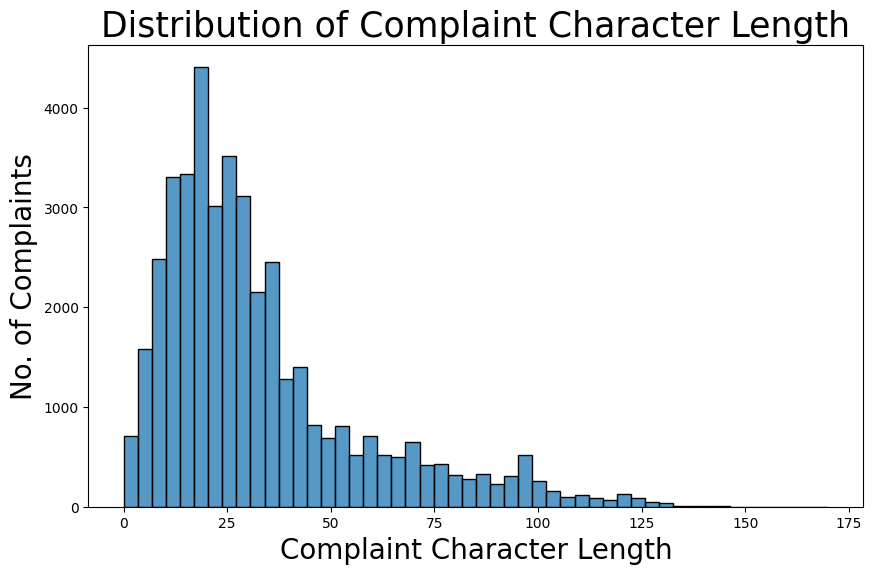

In [18]:
plt.figure(figsize=[10,6])
sns.histplot(data = char_len,bins=50)
plt.title('Distribution of Complaint Character Length', fontsize=25)
plt.xlabel('Complaint Character Length',size=20)
plt.ylabel('No. of Complaints',size=20)

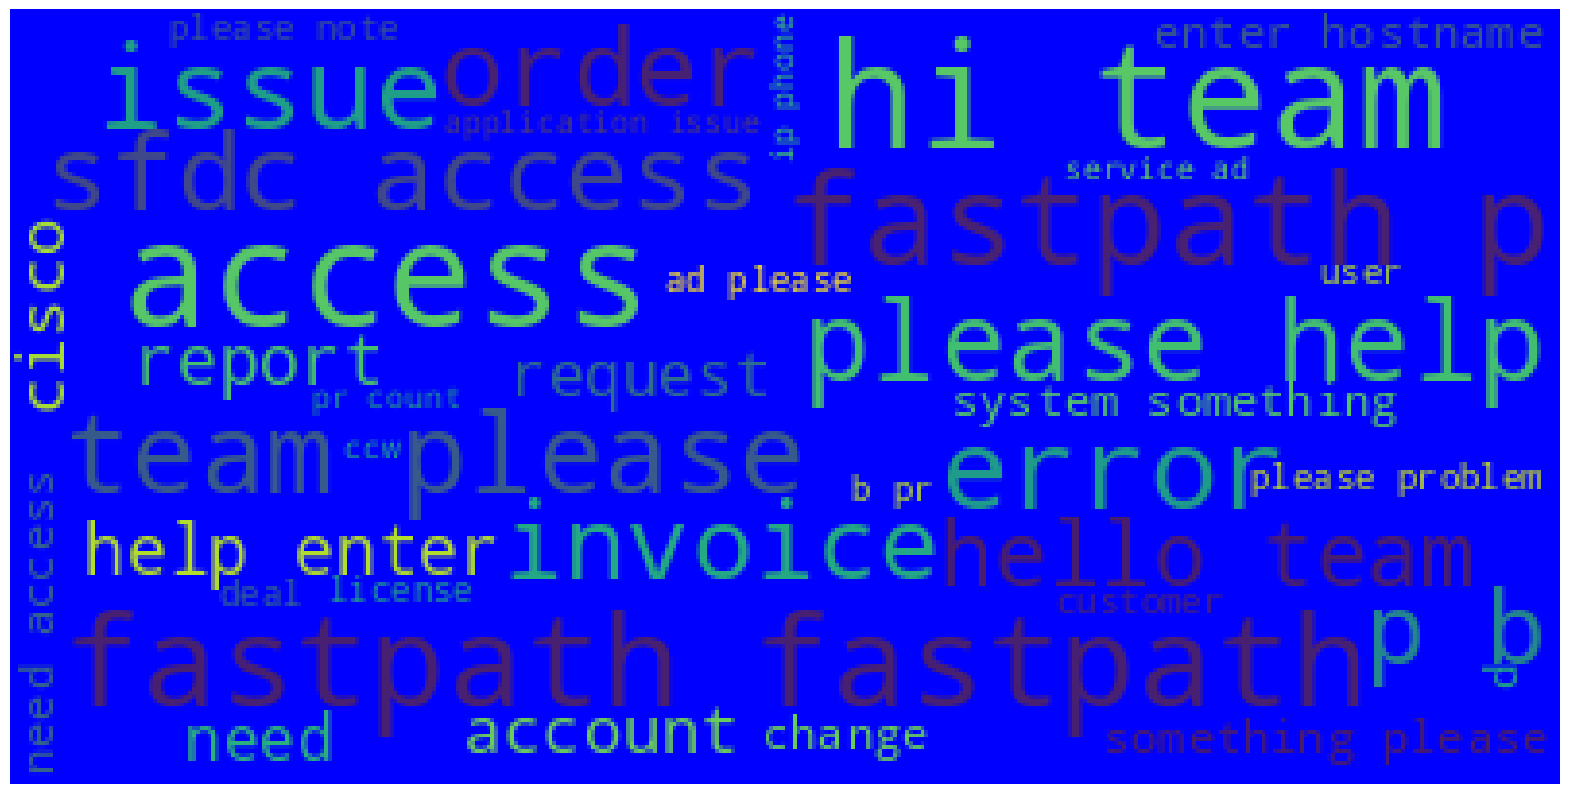

In [19]:
stop_words = set(STOPWORDS)
word_cloud = WordCloud(
                          background_color='blue',
                          stopwords=stop_words,
                          max_font_size=38,
                          max_words=38, 
                          random_state=42
                         ).generate(str(df_clean['description_POS_removed']))

fig = plt.figure(figsize=(20,16))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [20]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 

def get_top_unigram(text, n=30):

    vector = CountVectorizer(stop_words='english').fit(text)
    bag_of_words = vector.transform(text)
    sum_of_words = bag_of_words.sum(axis=0) 
    word_freq = [(word, sum_of_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    word_freq =sorted(word_freq, key = lambda x: x[1], reverse=True)
    return word_freq[:n]

In [21]:
top_common_words = get_top_unigram(df_clean['description_POS_removed'].values.astype('U'))
df_unigram = pd.DataFrame(top_common_words, columns = ['unigram' , 'count'])
df_unigram.head(10)

,unigram,count
0,access,8177
1,team,4893
2,order,4181
3,issue,3972
4,fastpath,3312
5,hi,2476
6,sfdc,2233
7,error,2101
8,request,2069
9,status,2014


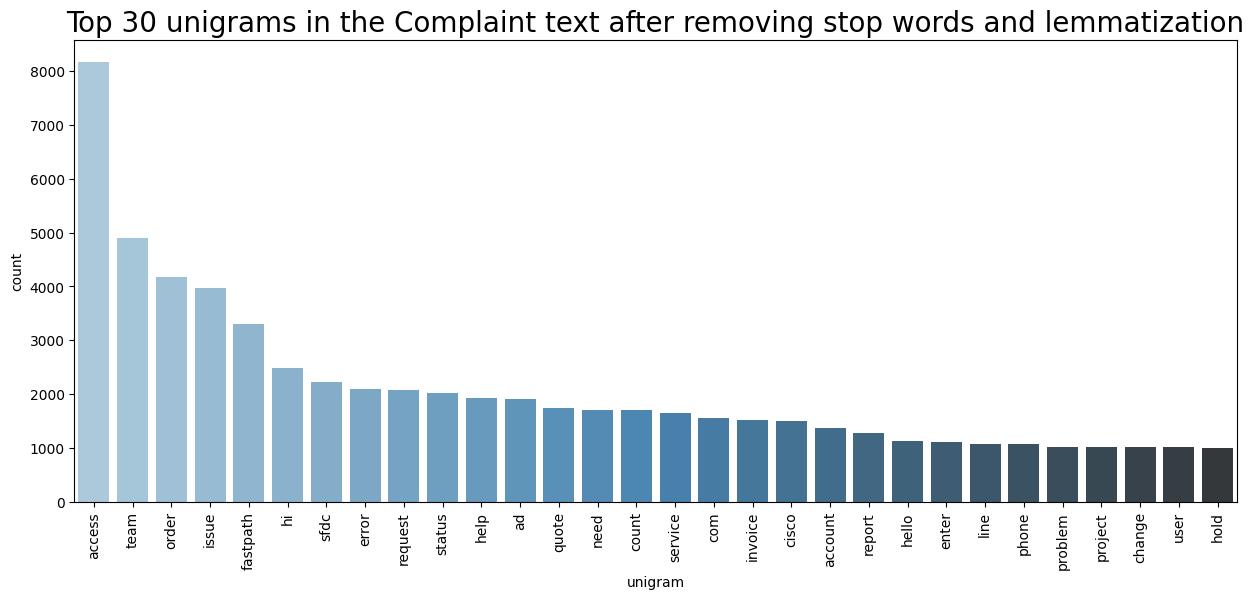

In [22]:
# Plot the top 30 unigrams
plt.figure(figsize=(15,6))
sns.barplot(x='unigram', y='count', data=df_unigram, palette="Blues_d")
plt.xticks(rotation=90)
plt.title("Top 30 unigrams in the Complaint text after removing stop words and lemmatization", fontsize=20)
plt.show()

In [23]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 
def get_top_bigram(text, n=30):

    vector = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(text)
    bag_of_words = vector.transform(text)
    sum_of_words = bag_of_words.sum(axis=0) 
    word_freq = [(word, sum_of_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    word_freq =sorted(word_freq, key = lambda x: x[1], reverse=True)
    return word_freq[:n]

In [24]:
#Print the top 10 words in the bigram frequency
top_common_words = get_top_bigram(df_clean['description_POS_removed'].values.astype('U'))
df_bigram = pd.DataFrame(top_common_words, columns = ['bigram' , 'count'])
df_bigram.head(10)

,bigram,count
0,hi team,2274
1,fastpath fastpath,1646
2,sfdc access,1134
3,hello team,994
4,help enter,938
5,cisco com,864
6,enter hostname,749
7,need access,650
8,team note,538
9,application issue,523


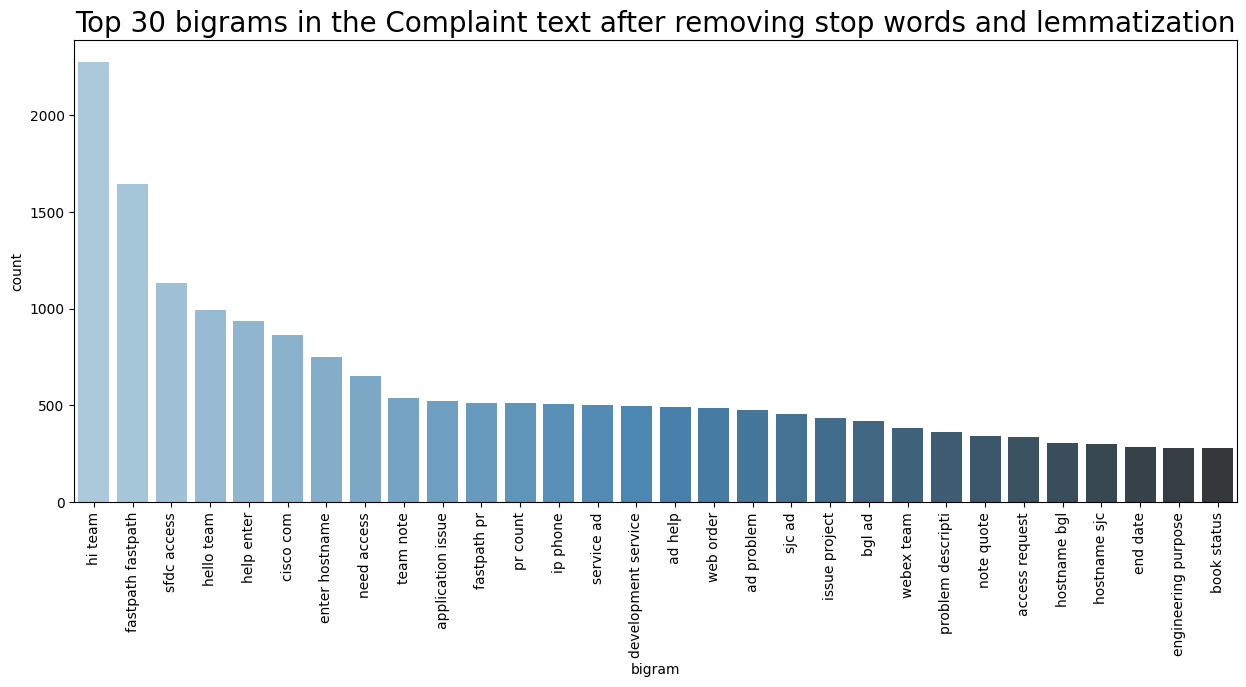

In [25]:
# Plot the top 30 unigrams
plt.figure(figsize=(15,6))
sns.barplot(x='bigram', y='count', data=df_bigram, palette="Blues_d")
plt.xticks(rotation=90)
plt.title("Top 30 bigrams in the Complaint text after removing stop words and lemmatization", fontsize=20)
plt.show()

In [26]:
#Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 
def get_top_trigram(text, n=30):

    vector = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(text)
    bag_of_words = vector.transform(text)
    sum_of_words = bag_of_words.sum(axis=0) 
    word_freq = [(word, sum_of_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    word_freq =sorted(word_freq, key = lambda x: x[1], reverse=True)
    return word_freq[:n]

In [27]:
#Print the top 10 words in the trigram frequency
top_common_words = get_top_trigram(df_clean['description_POS_removed'].values.astype('U'))
df_trigram = pd.DataFrame(top_common_words, columns = ['trigram' , 'count'])
df_trigram.head(10)

,trigram,count
0,help enter hostname,737
1,hi team note,527
2,fastpath fastpath pr,511
3,fastpath pr count,511
4,development service ad,499
5,service ad help,492
6,ad help enter,490
7,application issue project,432
8,ad problem descripti,344
9,team note quote,311


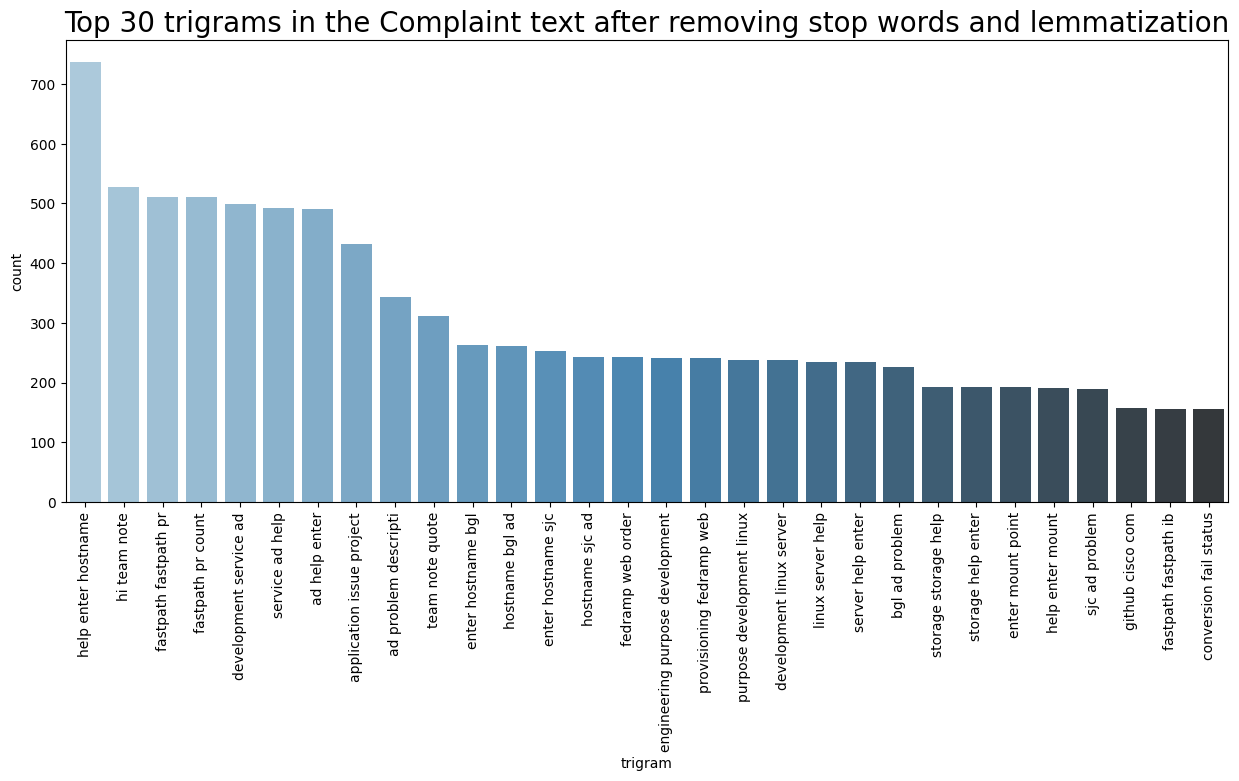

In [28]:
# Plot the top 30 unigrams
plt.figure(figsize=(15,6))
sns.barplot(x='trigram', y='count', data=df_trigram, palette="Blues_d")
plt.xticks(rotation=90)
plt.title("Top 30 trigrams in the Complaint text after removing stop words and lemmatization", fontsize=20)
plt.show()

In [29]:
df_cleaner=df_clean.copy()

In [30]:
df_cleaner=df_clean.copy()

In [36]:
#Write your code here to initialise the TfidfVectorizer 

tfidf=TfidfVectorizer(max_df=0.95,min_df=2,stop_words='english', ngram_range=(1,3), max_features=10000)

In [37]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
dtm=tfidf.fit_transform(df_clean['description_POS_removed'])

In [38]:
dtm.shape

(41899, 10000)

In [46]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import time

In [47]:
distortions = []
silhouette_avg = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 100)
  
for k in tqdm(K):
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, random_state=10)
    kmeanModel.fit(dtm)
    if k!=1:
        print(time.time())
        silhouette_avg.append(metrics.silhouette_score(dtm, kmeanModel.labels_))
        print(time.time())
    inertias.append(kmeanModel.inertia_)
    

  1%|▍                                           | 1/99 [00:00<00:28,  3.39it/s]

1661413883.281678


  2%|▉                                           | 2/99 [00:33<31:26, 19.45s/it]

1661413915.5349011
1661413916.1850102


  3%|█▎                                          | 3/99 [01:04<40:09, 25.10s/it]

1661413947.3552582
1661413948.0607567


  4%|█▊                                          | 4/99 [01:37<44:22, 28.02s/it]

1661413979.8558762
1661413980.724593


  5%|██▏                                         | 5/99 [02:09<46:16, 29.54s/it]

1661414012.0901191
1661414013.032788


  6%|██▋                                         | 6/99 [02:42<47:29, 30.64s/it]

1661414044.864838
1661414045.9958098


  7%|███                                         | 7/99 [03:14<47:35, 31.04s/it]

1661414076.717459
1661414077.9684644


  8%|███▌                                        | 8/99 [03:46<47:46, 31.50s/it]

1661414109.2202172
1661414110.7441914


  9%|████                                        | 9/99 [04:20<48:20, 32.22s/it]

1661414143.0279531
1661414144.7575033


 10%|████▎                                      | 10/99 [04:54<48:30, 32.70s/it]

1661414176.8031585
1661414179.0703502


 11%|████▊                                      | 11/99 [05:25<47:15, 32.23s/it]

1661414207.9479973
1661414209.8258424


 12%|█████▏                                     | 12/99 [05:59<47:33, 32.80s/it]

1661414242.0703511
1661414244.3549266


 13%|█████▋                                     | 13/99 [06:32<47:04, 32.85s/it]

1661414275.017457
1661414277.2435148


 14%|██████                                     | 14/99 [07:06<46:59, 33.17s/it]

1661414308.950696
1661414311.4928935


 15%|██████▌                                    | 15/99 [07:36<45:08, 32.25s/it]

1661414339.0564222
1661414341.5185485


 16%|██████▉                                    | 16/99 [08:08<44:38, 32.27s/it]

1661414371.365173
1661414374.1748984


 17%|███████▍                                   | 17/99 [08:40<43:39, 31.94s/it]

1661414402.546432
1661414405.0547504


 18%|███████▊                                   | 18/99 [09:15<44:33, 33.01s/it]

1661414438.0498853
1661414440.937398


 19%|████████▎                                  | 19/99 [09:46<43:07, 32.35s/it]

1661414468.8434296
1661414471.926185


 20%|████████▋                                  | 20/99 [10:21<43:38, 33.14s/it]

1661414503.842044
1661414508.040093


 21%|█████████                                  | 21/99 [10:54<43:00, 33.08s/it]

1661414536.7898512
1661414540.8736017


 22%|█████████▌                                 | 22/99 [11:28<42:50, 33.38s/it]

1661414570.8695745
1661414574.3404698


 23%|█████████▉                                 | 23/99 [12:00<41:55, 33.10s/it]

1661414603.311581
1661414606.707753


 24%|██████████▍                                | 24/99 [12:31<40:28, 32.38s/it]

1661414634.02274
1661414638.5101519


 25%|██████████▊                                | 25/99 [13:04<39:58, 32.41s/it]

1661414666.4841652
1661414670.1406088


 26%|███████████▎                               | 26/99 [13:39<40:27, 33.25s/it]

1661414701.710973
1661414706.659716


 27%|███████████▋                               | 27/99 [14:13<40:10, 33.48s/it]

1661414735.7059586
1661414740.5187173


 28%|████████████▏                              | 28/99 [14:48<40:04, 33.87s/it]

1661414770.4862328
1661414775.078629


 29%|████████████▌                              | 29/99 [15:24<40:29, 34.71s/it]

1661414807.1549094
1661414812.3189092


 30%|█████████████                              | 30/99 [15:57<39:09, 34.06s/it]

1661414839.6917198
1661414844.852042


 31%|█████████████▍                             | 31/99 [16:30<38:09, 33.67s/it]

1661414872.4657652
1661414877.3821306


 32%|█████████████▉                             | 32/99 [17:03<37:30, 33.58s/it]

1661414905.8450212
1661414911.521308


 33%|██████████████▎                            | 33/99 [17:41<38:23, 34.91s/it]

1661414943.8397493
1661414949.1929314


 34%|██████████████▊                            | 34/99 [18:16<37:57, 35.04s/it]

1661414979.1875896
1661414985.9329333


 35%|███████████████▏                           | 35/99 [18:54<38:21, 35.96s/it]

1661415017.2885423
1661415022.652073


 36%|███████████████▋                           | 36/99 [19:28<37:01, 35.26s/it]

1661415050.9052467
1661415056.6139503


 37%|████████████████                           | 37/99 [20:02<36:01, 34.86s/it]

1661415084.8580427
1661415090.201304


 38%|████████████████▌                          | 38/99 [20:37<35:23, 34.80s/it]

1661415119.5203667
1661415126.0061946


 39%|████████████████▉                          | 39/99 [21:13<35:12, 35.20s/it]

1661415155.6604886
1661415162.0329034


 40%|█████████████████▎                         | 40/99 [21:46<34:10, 34.75s/it]

1661415189.3466437
1661415195.9982018


 41%|█████████████████▊                         | 41/99 [22:24<34:19, 35.50s/it]

1661415226.601251
1661415233.6908197


 42%|██████████████████▏                        | 42/99 [22:58<33:18, 35.06s/it]

1661415260.630133
1661415267.5089295


 43%|██████████████████▋                        | 43/99 [23:33<32:42, 35.04s/it]

1661415295.6173491
1661415302.2332623


 44%|███████████████████                        | 44/99 [24:08<32:13, 35.15s/it]

1661415331.0254264
1661415338.063748


 45%|███████████████████▌                       | 45/99 [24:47<32:33, 36.18s/it]

1661415369.5957093
1661415377.0688298


 46%|███████████████████▉                       | 46/99 [25:24<32:17, 36.55s/it]

1661415407.0341475
1661415414.0847352


 47%|████████████████████▍                      | 47/99 [26:00<31:26, 36.28s/it]

1661415442.6731987
1661415450.1201293


 48%|████████████████████▊                      | 48/99 [26:38<31:23, 36.93s/it]

1661415481.1111727
1661415487.710559


 49%|█████████████████████▎                     | 49/99 [27:12<29:59, 35.98s/it]

1661415514.8876245
1661415522.014857


 51%|█████████████████████▋                     | 50/99 [27:50<29:47, 36.48s/it]

1661415552.5203838
1661415561.1191552


 52%|██████████████████████▏                    | 51/99 [28:30<30:02, 37.54s/it]

1661415592.5567255
1661415600.8429139


 53%|██████████████████████▌                    | 52/99 [29:05<28:51, 36.83s/it]

1661415627.732068
1661415636.173803


 54%|███████████████████████                    | 53/99 [29:44<28:52, 37.65s/it]

1661415667.3014078
1661415675.3140838


 55%|███████████████████████▍                   | 54/99 [30:21<27:57, 37.27s/it]

1661415703.6870315
1661415711.681068


 56%|███████████████████████▉                   | 55/99 [30:58<27:13, 37.13s/it]

1661415740.4939466
1661415749.7245245


 57%|████████████████████████▎                  | 56/99 [31:36<26:49, 37.44s/it]

1661415778.6432185
1661415788.8893254


 58%|████████████████████████▊                  | 57/99 [32:14<26:22, 37.67s/it]

1661415816.8425577
1661415826.268349


 59%|█████████████████████████▏                 | 58/99 [32:53<26:03, 38.13s/it]

1661415856.0443919
1661415865.0659091


 60%|█████████████████████████▋                 | 59/99 [33:29<24:58, 37.45s/it]

1661415891.9264064
1661415901.0257


 61%|██████████████████████████                 | 60/99 [34:05<24:04, 37.04s/it]

1661415928.0067952
1661415936.665242


 62%|██████████████████████████▍                | 61/99 [34:44<23:51, 37.67s/it]

1661415967.1404772
1661415976.8206608


 63%|██████████████████████████▉                | 62/99 [35:22<23:12, 37.62s/it]

1661416004.660645
1661416014.766553


 64%|███████████████████████████▎               | 63/99 [35:59<22:29, 37.48s/it]

1661416041.8196518
1661416049.9494152


 65%|███████████████████████████▊               | 64/99 [36:35<21:34, 36.98s/it]

1661416077.6066146
1661416087.4700341


 66%|████████████████████████████▏              | 65/99 [37:12<21:01, 37.10s/it]

1661416115.0096977
1661416126.6731389


 67%|████████████████████████████▋              | 66/99 [37:56<21:26, 39.00s/it]

1661416158.4339519
1661416169.7639196


 68%|█████████████████████████████              | 67/99 [38:37<21:09, 39.66s/it]

1661416199.6495838
1661416209.6455765


 69%|█████████████████████████████▌             | 68/99 [39:16<20:26, 39.58s/it]

1661416239.0287354
1661416249.5011168


 70%|█████████████████████████████▉             | 69/99 [39:57<20:01, 40.06s/it]

1661416280.211269
1661416291.1752925


 71%|██████████████████████████████▍            | 70/99 [40:36<19:06, 39.53s/it]

1661416318.4921753
1661416328.9635823


 72%|██████████████████████████████▊            | 71/99 [41:13<18:08, 38.89s/it]

1661416355.9070132
1661416366.0494905


 73%|███████████████████████████████▎           | 72/99 [41:51<17:18, 38.48s/it]

1661416393.4238474
1661416404.461832


 74%|███████████████████████████████▋           | 73/99 [42:31<16:53, 38.98s/it]

1661416433.5850258
1661416444.779261


 75%|████████████████████████████████▏          | 74/99 [43:12<16:29, 39.58s/it]

1661416474.5445342
1661416486.3660023


 76%|████████████████████████████████▌          | 75/99 [43:51<15:45, 39.38s/it]

1661416513.463631
1661416525.2218647


 77%|█████████████████████████████████          | 76/99 [44:30<15:08, 39.51s/it]

1661416553.277293
1661416564.4382532


 78%|█████████████████████████████████▍         | 77/99 [45:09<14:22, 39.20s/it]

1661416591.7481723
1661416602.7928107


 79%|█████████████████████████████████▉         | 78/99 [45:47<13:39, 39.02s/it]

1661416630.3547897
1661416641.1931715


 80%|██████████████████████████████████▎        | 79/99 [46:27<13:05, 39.25s/it]

1661416670.1547806
1661416681.6694682


 81%|██████████████████████████████████▋        | 80/99 [47:07<12:30, 39.51s/it]

1661416710.2718394
1661416721.0767438


 82%|███████████████████████████████████▏       | 81/99 [47:45<11:40, 38.94s/it]

1661416747.858419
1661416758.8528998


 83%|███████████████████████████████████▌       | 82/99 [48:25<11:09, 39.40s/it]

1661416788.3522048
1661416800.9529274


 84%|████████████████████████████████████       | 83/99 [49:07<10:42, 40.17s/it]

1661416830.3137808
1661416842.7437913


 85%|████████████████████████████████████▍      | 84/99 [49:46<09:57, 39.82s/it]

1661416869.3062446
1661416881.3218505


 86%|████████████████████████████████████▉      | 85/99 [50:30<09:34, 41.01s/it]

1661416913.1044006
1661416925.113969


 87%|█████████████████████████████████████▎     | 86/99 [51:09<08:42, 40.20s/it]

1661416951.4013994
1661416966.170649


 88%|█████████████████████████████████████▊     | 87/99 [51:55<08:25, 42.12s/it]

1661416997.9965687
1661417010.8064177


 89%|██████████████████████████████████████▏    | 88/99 [52:39<07:48, 42.55s/it]

1661417041.5448532
1661417057.6829233


 90%|██████████████████████████████████████▋    | 89/99 [53:22<07:08, 42.82s/it]

1661417084.9974337
1661417098.4535196


 91%|███████████████████████████████████████    | 90/99 [54:05<06:24, 42.74s/it]

1661417127.5535824
1661417140.4901512


 92%|███████████████████████████████████████▌   | 91/99 [54:45<05:37, 42.13s/it]

1661417168.2481616
1661417181.1414728


 93%|███████████████████████████████████████▉   | 92/99 [55:28<04:56, 42.40s/it]

1661417211.299258
1661417225.4905097


 94%|████████████████████████████████████████▍  | 93/99 [56:09<04:11, 42.00s/it]

1661417252.3518133
1661417266.6418989


 95%|████████████████████████████████████████▊  | 94/99 [56:51<03:29, 41.80s/it]

1661417293.697376
1661417307.8229449


 96%|█████████████████████████████████████████▎ | 95/99 [57:33<02:47, 41.85s/it]

1661417335.6617603
1661417348.9092808


 97%|█████████████████████████████████████████▋ | 96/99 [58:14<02:05, 41.78s/it]

1661417377.2757273
1661417392.3333569


 98%|██████████████████████████████████████████▏| 97/99 [58:58<01:24, 42.23s/it]

1661417420.5545423
1661417434.4530082


 99%|██████████████████████████████████████████▌| 98/99 [59:39<00:41, 41.96s/it]

1661417461.8875668
1661417476.5684197


100%|█████████████████████████████████████████| 99/99 [1:00:21<00:00, 36.58s/it]

1661417503.8100464


In [48]:
for i in range(len(K)):
    print(K[i], inertias[i])
    print(K[i], silhouette_avg[i])

1 40980.91118537265
1 0.012131693187920378
2 40245.03518167946
2 0.022696484162925187
3 39598.04867147197
3 0.026671411378224607
4 39303.48291163733
4 0.026899175837988232
5 39102.42812888483
5 0.02919980293322425
6 39036.200003090846
6 0.029616168223012863
7 38778.87946818277
7 0.032066428809728605
8 38441.46817226881
8 0.0333764900008603
9 38435.26139615848
9 0.03544186113308714
10 38177.7075579168
10 0.036981666424222515
11 37902.18786883368
11 0.036604659283571435
12 37846.91803920379
12 0.03884436976150147
13 37614.646172524685
13 0.04024880423742561
14 37533.84929534506
14 0.04308351425958224
15 37255.943632257346
15 0.04220357752687784
16 37262.3032659513
16 0.044811871432742144
17 37217.52789946416
17 0.045798108064525736
18 36971.17912098578
18 0.04583139578840411
19 36904.68450114342
19 0.049278894457730156
20 36738.724028974364
20 0.04897582264321875
21 36806.45945445539
21 0.050783132037074644
22 36468.88399573852
22 0.04920750033439438
23 36541.64565568859
23 0.05020793927

IndexError: list index out of range

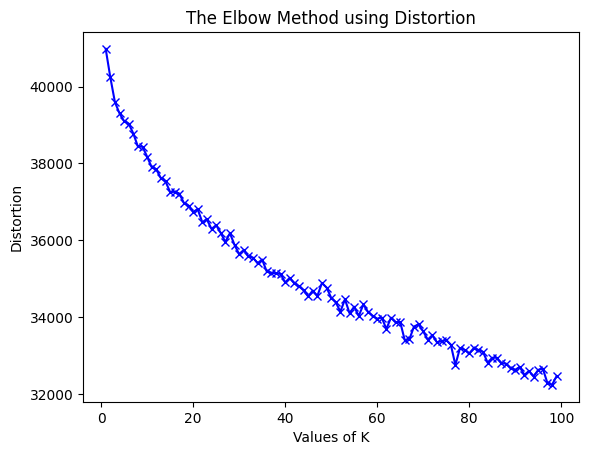

In [49]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

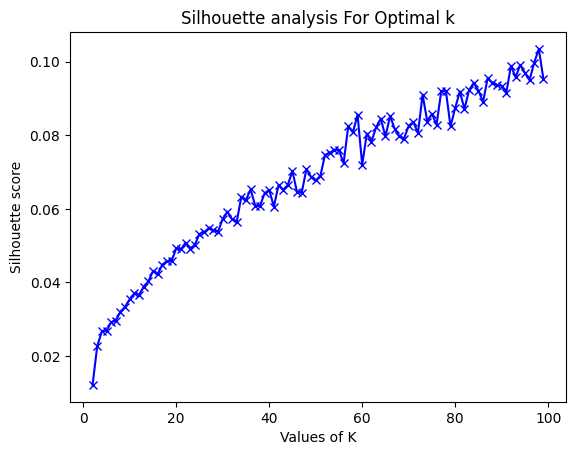

In [53]:
plt.plot(K[1:],silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [46]:
kmeans = KMeans(n_clusters=5, random_state=5).fit(dtm)

In [50]:
kmeans.cluster_centers_.shape

(5, 4912)

In [52]:
cluster_center = tfidf.inverse_transform(kmeans.cluster_centers_)

array(['aa', 'aaccess', 'aaldaych', ..., 'zoom', 'zuora', 'zuroa'],
      dtype='<U26')

In [34]:
from sklearn.decomposition import NMF

In [35]:
#Coherence model to find best number of topics
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from gensim.models.coherencemodel import CoherenceModel
from operator import itemgetter

# Use Gensim's NMF to get the best num of topics via coherence score
texts = df_clean['description_POS_removed']
data_set = [x.split() for x in texts]

# Creating a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(data_set)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)


In [36]:
# Creating the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in data_set]

# Create a list of the topic numbers we want to try
topic_num = list(np.arange(5, 10, 1))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

In [37]:
print(len(topic_num))

5


In [41]:
topic_num

[5, 6, 7, 8, 9]

In [44]:
for num in tqdm(topic_num):
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=40,
    )
    print("x")
    # Run the coherence model to get the score
    coherence_model = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_uci'
    )
    print("y")
    coherence_scores.append(round(coherence_model.get_coherence(), 5))
    

  0%|                                                     | 0/5 [00:00<?, ?it/s]

x
y


Process AccumulatingWorker-43:
Process AccumulatingWorker-36:
Process AccumulatingWorker-32:
Process AccumulatingWorker-38:
Process AccumulatingWorker-41:
Process AccumulatingWorker-34:
Process AccumulatingWorker-40:
Process AccumulatingWorker-37:
Process AccumulatingWorker-42:
Process AccumulatingWorker-33:
Process AccumulatingWorker-39:
Process AccumulatingWorker-31:
Process AccumulatingWorker-35:
Traceback (most recent call last):
Process AccumulatingWorker-44:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/sandrajacob/miniconda3/envs/neuroenv/lib/python3.10/multiprocessing/process.py", line 318, in _bootstrap
    util._exit_function()
Traceback (most recent call last):
Process AccumulatingWorker-45:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/sandrajacob/miniconda3/envs/neuroenv/lib/python3.10/multiprocessing/process.py", line 318, in _b

  File "/home/sandrajacob/miniconda3/envs/neuroenv/lib/python3.10/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/sandrajacob/miniconda3/envs/neuroenv/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/sandrajacob/miniconda3/envs/neuroenv/lib/python3.10/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/sandrajacob/miniconda3/envs/neuroenv/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/sandrajacob/miniconda3/envs/neuroenv/lib/python3.10/multiprocessing/queues.py", line 201, in _finalize_join
    thread.join()
  File "/home/sandrajacob/miniconda3/envs/neuroenv/lib/python3.10/multiprocessing/queues.py", line 201, in _finalize_join
    thread.join()
  File "/home/sandrajacob/miniconda3/envs/neuroenv/lib/python3.10/multiprocessing/util.py", line 224, in __cal

KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  0%|                                                     | 0/5 [05:13<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
# Get the number of topics with the highest coherence score
scores = list(zip(topic_num, coherence_scores))
best_topics_num = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

print(best_topics_num)

In [ ]:
df_clean.shape

In [ ]:
# Making a copy of df_clean incase any error occurs
df_cleanx =df_clean.copy()

In [ ]:
#Load your nmf_model with the n_components i.e 5

nmf_model = NMF(n_components=5,random_state=40)

In [ ]:
nmf_model.fit(dtm)
len(tfidf.get_feature_names())

In [ ]:
# Print the top word of a sample component
topic_single = nmf_model.components_[0]
topic_single.argsort()
top_word_index = topic_single.argsort()[-10:]
for index in top_word_index:
    print(tfidf.get_feature_names()[index])

In [ ]:
#Print the Top15 words for each of the topics
for index, topic in enumerate(nmf_model.components_):
    print(f'TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

In [ ]:
# Create a new 'Topic' column and assign the best topic to each of the complaints

df_clean['Topic'] = topic_result.argmax(axis=1)

In [ ]:
df_clean.shape

In [ ]:
df_clean.head()

In [ ]:
#Print the first 5 Complaint for each of the Topics
df_clean_5=df_clean.groupby('Topic').head(5)
df_clean_5.sort_values('Topic')